In [1]:
#regression probles neural networks predict hart problem

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r'E:\project\Day 04\nadil\regersion problem\cardio_dataset.csv')
df

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,2,48,236,66,0,2,0,1.1
1,1,48,260,51,0,2,1,7.0
2,1,44,187,49,1,2,0,7.0
3,2,42,216,57,1,2,0,0.4
4,2,56,156,42,0,2,0,2.2
...,...,...,...,...,...,...,...,...
6639,2,65,307,42,1,1,1,36.6
6640,2,42,169,56,0,1,0,0.8
6641,1,65,212,35,1,1,0,30.6
6642,1,66,184,39,0,1,0,23.8


In [4]:
#data and target 

In [5]:
dataset=df.values #load dataset in to numpy array

data=dataset[:,0:7]
target=dataset[:,7]


In [6]:
print(target,target.shape)

[ 1.1  7.   7.  ... 30.6 23.8  1. ] (6644,)


In [7]:
#Scalling

In [8]:
from sklearn.preprocessing import MinMaxScaler #library ekak scaling wlt gnna.

target=np.reshape(target, (-1,1)) #scaler ekt danna raget eka 2d wdhta tynna oni. ekai mehema kare.

scaler_data = MinMaxScaler() #make object
scaler_target = MinMaxScaler() #make object

scaler_data.fit(data)
scaler_target.fit(target)

data_scaled=scaler_data.transform(data)
target_scaled=scaler_target.transform(target)

In [9]:
print(data_scaled)

[[1.         0.20512821 0.40045249 ... 0.         1.         0.        ]
 [0.         0.20512821 0.45475113 ... 0.         1.         1.        ]
 [0.         0.1025641  0.28959276 ... 1.         1.         0.        ]
 ...
 [0.         0.64102564 0.34615385 ... 1.         0.         0.        ]
 [0.         0.66666667 0.28280543 ... 0.         0.         0.        ]
 [1.         0.12820513 0.32579186 ... 0.         1.         0.        ]]


In [10]:
print(target_scaled)

[[0.01172333]
 [0.08089097]
 [0.08089097]
 ...
 [0.35756155]
 [0.27784291]
 [0.010551  ]]


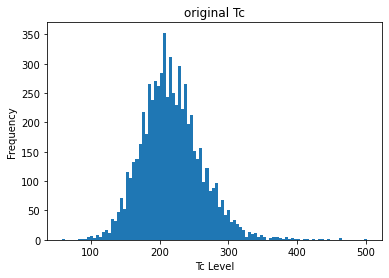

In [11]:
plt.hist(data[:,2],bins=100)
plt.title('original Tc')
plt.xlabel('Tc Level')
plt.ylabel('Frequency')
plt.show()

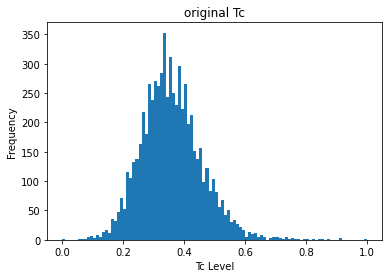

In [12]:
plt.hist(data_scaled[:,2],bins=100)
plt.title('original Tc')
plt.xlabel('Tc Level')
plt.ylabel('Frequency')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled,test_size=0.2)

In [14]:
print(train_data)

[[1.         0.84615385 0.40723982 ... 0.         1.         0.        ]
 [0.         0.05128205 0.21719457 ... 1.         1.         0.        ]
 [1.         0.38461538 0.50452489 ... 0.         1.         0.        ]
 ...
 [0.         0.66666667 0.41176471 ... 1.         1.         0.        ]
 [1.         0.58974359 0.48868778 ... 1.         1.         0.        ]
 [1.         0.1025641  0.27828054 ... 1.         1.         1.        ]]


In [15]:
print(train_target)

[[0.14536928]
 [0.03048066]
 [0.02227433]
 ...
 [0.23798359]
 [0.12778429]
 [0.06565064]]


In [19]:
import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers
from keras.layers import Dropout
import numpy as np

model = models.Sequential()
model.add(layers.Dense(128, input_dim=7, activation='softmax'))
model.add(layers.Dense(64, activation='softmax'))
model.add(layers.Dense(10, activation='softmax'))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae']) #mean squared error and mean absolute error mse and mae regression nisa

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 9,941
Trainable params: 9,941
Non-trainable params: 0
_________________________________________________________________


In [20]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2)

Epoch 1/200
133/133 [==============================] - 2s 4ms/step - loss: 0.0255 - mse: 0.0255 - mae: 0.1164 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.1198
Epoch 2/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0233 - mse: 0.0233 - mae: 0.1183 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.1171
Epoch 3/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0232 - mse: 0.0232 - mae: 0.1177 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.1165
Epoch 4/200
133/133 [==============================] - 0s 3ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.1172 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1189
Epoch 5/200
133/133 [==============================] - 0s 3ms/step - loss: 0.0224 - mse: 0.0224 - mae: 0.1153 - val_loss: 0.0225 - val_mse: 0.0225 - val_mae: 0.1115
Epoch 6/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0186 - mse: 0.0186 - mae: 0.1028 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0955
Epoch 7/20

133/133 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0350 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0366
Epoch 51/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0350 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0366
Epoch 52/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0348 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0376
Epoch 53/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0350 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0366
Epoch 54/200
133/133 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0348 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0365
Epoch 55/200
133/133 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0351 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0367
Epoch 56/200
133/

133/133 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0336 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0355
Epoch 100/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0335 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0354
Epoch 101/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0338 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0362
Epoch 102/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0336 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0359
Epoch 103/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0336 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0353
Epoch 104/200
133/133 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0335 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0352
Epoch 105/20

133/133 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0329 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0350
Epoch 149/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0328 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0344
Epoch 150/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0331 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0354
Epoch 151/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0329 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0350
Epoch 152/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0334 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0361
Epoch 153/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0331 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0346
Epoch 154/20

133/133 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0326 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0345
Epoch 198/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0326 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0349
Epoch 199/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0325 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0339
Epoch 200/200
133/133 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0326 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0346


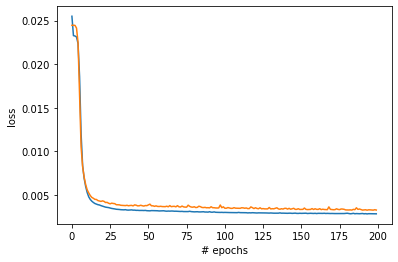

In [21]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
 model.save('.model')